<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%208%20%26%209-IMDb/Exp_8%269_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,GRU,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb

In [ ]:
def decode_review(review):
    return ' '.join([reverse_word_index.get(i-3,'?') for i in review])

In [ ]:
def load_imdb_data(max_features,maxlen):
    (x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
    x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
    x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
    return x_train,y_train,x_test,y_test



In [ ]:
def rnn_model(max_features,maxlen):
    model=Sequential([
        Embedding(max_features,32,input_length=maxlen),
        SimpleRNN(32),
        Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
def lstm_model(max_features,maxlen):
    model=Sequential([
        Embedding(max_features,32,input_length=maxlen),
        LSTM(32),
        Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
def gru_model(max_features,maxlen):
    model=Sequential([
        Embedding(max_features,32,input_length=maxlen),
        GRU(32),
        Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
def training_and_evaluation(model,x_train,y_train,x_test,y_test,epochs=3,batch_size=128):
    history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=2)
    loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
    for i in range(2):
        index=np.random.randint(0,len(x_test))
        review=x_test[index]
        actual_label=y_test[index]
        probab=model.predict(np.expand_dims(review,axis=0))[0,0]
        print(f'review{decode_review(review)}')
        label=1 if probab>0.5 else 0
        print(f'review{i+1}')
        print(f'actual_label{actual_label}')
        print(f'predicted_label{label}')
    return history,loss,accuracy

In [ ]:
max_features=10000
maxlen=100

In [ ]:
def plotting(history,model_name):
    print(f'model:  {model_name}')
    print(f'accuracy:  {accuracy}')
    print(f'loss:  {loss}')
    plt.title(f'accuracy vs validation accuracy')
    plt.plot(history.history['accuracy'],label='training accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acuracy')
    plt.show()

Epoch 1/3
157/157 - 11s - loss: 0.6040 - accuracy: 0.6504 - val_loss: 0.4256 - val_accuracy: 0.8124 - 11s/epoch - 67ms/step
Epoch 2/3
157/157 - 7s - loss: 0.3340 - accuracy: 0.8611 - val_loss: 0.3720 - val_accuracy: 0.8408 - 7s/epoch - 46ms/step
Epoch 3/3
157/157 - 7s - loss: 0.2247 - accuracy: 0.9157 - val_loss: 0.4037 - val_accuracy: 0.8318 - 7s/epoch - 42ms/step
1/1 [==============================] - 0s 330ms/step
reviewcould easily have been ? in his ultimately caring attitude ? keeps him sharp enough to keep him from being too sweet but the revelation is stephen robertson as michael not since ? ? ? in gilbert ? has anyone so perfectly captured a person with an ? that i began to believe he really was an actor with cerebral ? and his eyes my god he can rip you apart with them br br this movie is to ? ? f ? amazing go see it take a box of ? and enjoy every well earned tear and laugh
review1
actual_label1
predicted_label1
1/1 [==============================] - 0s 63ms/step
reviewonly 

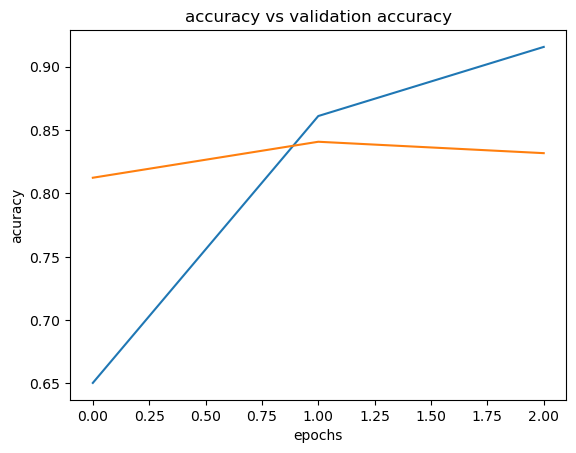

In [ ]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

x_train,y_train,x_test,y_test=load_imdb_data(max_features,maxlen)
rnn=rnn_model(max_features,maxlen)
history,loss,accuracy=training_and_evaluation(rnn,x_train,y_train,x_test,y_test)
plotting(history,'rnn')


Epoch 1/3
157/157 - 21s - loss: 0.5020 - accuracy: 0.7435 - val_loss: 0.3513 - val_accuracy: 0.8446 - 21s/epoch - 131ms/step
Epoch 2/3
157/157 - 15s - loss: 0.2771 - accuracy: 0.8892 - val_loss: 0.3942 - val_accuracy: 0.8350 - 15s/epoch - 95ms/step
Epoch 3/3
157/157 - 15s - loss: 0.2114 - accuracy: 0.9214 - val_loss: 0.3571 - val_accuracy: 0.8422 - 15s/epoch - 97ms/step
1/1 [==============================] - 1s 1s/step
reviewand i did not understand the film my good ? friend wow what a long name explained every thing to me what a great movie after watching this movie i felt i should have watched many more movies from ? ? film industry the war scenes were amazing camera work excellent and plot beautiful the actress what a beauty give her an award for best looking someone ? ? ? come on i smell a oscar winner i didnt understand the songs but they were excellent ? is a great director and i hope his next film was a success
review1
actual_label1
predicted_label1
1/1 [========================

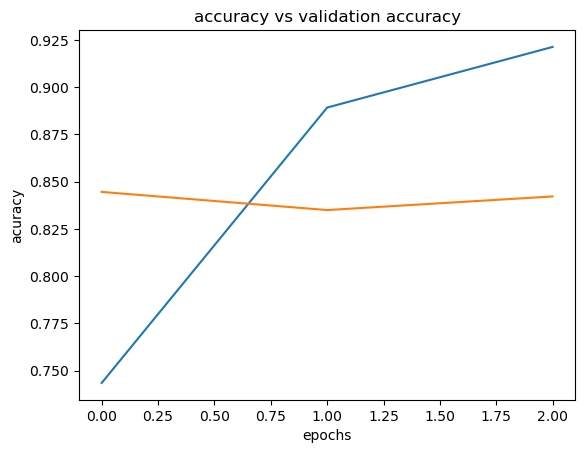

In [ ]:

lstm=lstm_model(max_features,maxlen)
history,loss,accuracy=training_and_evaluation(lstm,x_train,y_train,x_test,y_test)
plotting(history,'lstm')

Epoch 1/3
157/157 - 21s - loss: 0.5277 - accuracy: 0.7103 - val_loss: 0.3646 - val_accuracy: 0.8376 - 21s/epoch - 132ms/step
Epoch 2/3
157/157 - 14s - loss: 0.2875 - accuracy: 0.8835 - val_loss: 0.3711 - val_accuracy: 0.8442 - 14s/epoch - 90ms/step
Epoch 3/3
157/157 - 14s - loss: 0.2163 - accuracy: 0.9191 - val_loss: 0.3737 - val_accuracy: 0.8412 - 14s/epoch - 89ms/step
1/1 [==============================] - 1s 880ms/step
reviewboy who is not in the military and has not trained to be a jet pilot takes off for a foreign country to rescue his dad if this is not ridiculous enough he talks a colonel in the air force into helping him get his hands on a jet wow to make the picture even more absurd the colonel risks his career and life by giving the ? ? some hands on aid they not only don't make like this anymore but they never did this sappy corny film should be tossed into the air and blown away by a
review1
actual_label0
predicted_label0
1/1 [==============================] - 0s 62ms/step


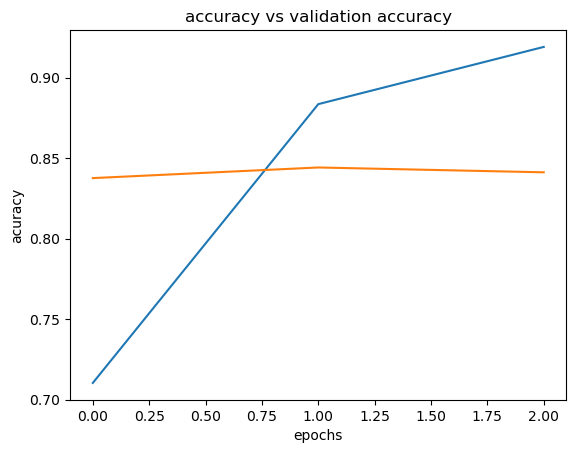

In [ ]:

gru=gru_model(max_features,maxlen)
history,loss,accuracy=training_and_evaluation(gru,x_train,y_train,x_test,y_test)
plotting(history,'gru')